## Lets Start by Importing few Important Libraries
     please make sure to save the notebook on the same directory where you have saved the data. 
   ### Enjoy! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import datetime
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

## Set up jupyter notebook
    Extract the repositories from git
    Run following kernel to get file import hassel free working
   ### Enjoy!

In [2]:
from pathlib import Path
mypath = Path().absolute()
mypath = str(mypath) + '/Data'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['DGS3MO.xls',
 'DGS3.xls',
 'DGS5.xls',
 'DGS2.xls',
 'DGS10.xls',
 'DGS1.xls',
 'DGS30.xls']

## Example data from the exel, uncleaned
    First few lines contains the description about the data, which we don't need for our analysis. 

In [3]:
file_1 = pd.read_excel(str(mypath)+'/DGS10.xls')
file_1.head(15)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fred.stlouisfed.org/help-faq,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
5,NaN,NaN
6,DGS10,"10-Year Treasury Constant Maturity Rate, Perce..."
7,NaN,NaN
8,Frequency: Daily,NaN
9,observation_date,DGS10


## Data Import and Cleaning
    
    Using a For loop to find all the excel files
    Each loop does following:
        1. Import the file
        2. Remove the unwanted description.
        3. Remove NAs
        4. Reset Index
        5. Rename the column
        6. Remove records with interest rate = 0 (mostly Sunday and public holidays)
        7. Convert date from str to datetime


In [4]:

files_xls = [i for i in onlyfiles if i[-3:]== 'xls']                 # import only xls

all_file={}

for j in files_xls:
    
    file = pd.read_excel('Data/'+ str(j)).dropna()                   # import excel file, removed rows with Nan
    
    file.reset_index(inplace= True, drop =True)                      # reset index

    for k in file.index:                                             # To rename the columns, for loop will search for datetime 
        if type(file.loc[k][0]) == datetime.datetime:                # untill finds a datetime and rename the column 
            break
    file.columns = file.iloc[k-1]

    for k,i in  enumerate(file[str(file.columns[0])]):               # Data cleaning for bad datetime
        if type(i) != datetime.datetime:
            file.drop(k, inplace= True)
            
    file.drop(file[file[file.columns[-1]]==0].index, inplace= True)  # Drop all rows with interest rate 0, mainly weekends
    
    file.reset_index(drop= True, inplace = True)                     # Reset Index
    
    file['observation_date'] = pd.to_datetime(file['observation_date'])
    
    all_file[str(j)] = file                                          # Save clean DataFrame in the empty dictionary
    

---
## Merge columns from all the DataFrames
    
    Using Pandas.merge(), inner join on date field 
    Using reduce fuction, inner join all seven Dataframes in single line of code, 

In [5]:
result = reduce(lambda left, right: pd.merge(left, right , sort=False,
                                              on = ['observation_date'], 
                                              how = 'outer'), all_file.values())
result.tail(15)

1,observation_date,DGS3MO,DGS3,DGS5,DGS2,DGS10,DGS1,DGS30
14146,2011-10-05,NaN,0.43,NaN,0.25,1.92,0.1,NaN
14147,2011-12-15,NaN,0.37,NaN,0.26,1.92,0.12,NaN
14148,2011-12-16,NaN,0.35,NaN,0.24,1.86,0.11,NaN
14149,2013-09-26,NaN,0.67,1.43,0.34,2.66,0.09,3.69
14150,2015-09-18,NaN,0.97,1.45,0.69,2.13,0.35,2.93
14151,2015-09-22,NaN,0.97,1.44,0.69,2.14,0.35,2.94
14152,2015-09-25,NaN,1,1.48,0.7,2.17,0.35,2.96
14153,2015-09-30,NaN,0.92,1.37,0.64,2.06,0.33,2.87
14154,2015-10-01,NaN,0.92,1.37,0.64,2.05,0.31,2.85
14155,2015-10-02,NaN,0.85,1.29,0.58,1.99,0.25,2.82


---
## Plot Interactive Visualizations
    
    -for installation
        $ pip install plotly == 2.7.0 
            or
        $ pip install plotly --upgrade
        
    Using plotly for python,
        use mouse pointer to see the exact tooltip values
        Enjoy the zoom by drawing a square to part of the graph to look closely. 
        
   ### Enjoy!
   
       Future version will have a drop down filters
    

In [16]:
result = result.dropna(axis=0)
result.index = result['observation_date']
del result['observation_date']
result.head()

1,DGS3MO,DGS3,DGS5,DGS2,DGS10,DGS1,DGS30
observation_date,,,,,,,
2013-09-13,0.01,0.87,1.71,0.45,2.9,0.13,3.84
2013-09-16,0.02,0.8,1.65,0.41,2.88,0.13,3.87
2013-09-17,0.01,0.78,1.62,0.39,2.86,0.12,3.84
2013-09-18,0.01,0.67,1.43,0.34,2.69,0.11,3.75
2013-09-19,0.01,0.69,1.49,0.34,2.76,0.1,3.8


In [19]:
#calculating principal amounts for all data
priceOne = []
priceTwo = []
priceThree = []
priceFour = []
priceFive = []
priceSix = []
priceSeven = []
for index,row in result.iterrows():
    matpriceThreeMonths = 1000/((1+row['DGS3MO'])**0.25)
    matpriceThree = 1000/((1+row['DGS3'])**3)
    matpriceFiveyr = 1000/((1+row['DGS5'])**5)
    matpriceTwoyr = 1000/((1+row['DGS2'])**2)
    matpriceTenyr = 1000/((1+row['DGS10'])**10)
    matpriceOneyr = 1000/((1+row['DGS1'])**1)
    matpriceThirtyr = 1000/((1+row['DGS30'])**30)
    priceOne.append(matpriceThreeMonths)
    priceTwo.append(matpriceThree)
    priceThree.append(matpriceFiveyr)
    priceFour.append(matpriceTwoyr)
    priceFive.append(matpriceTenyr)
    priceSix.append(matpriceOneyr)
    priceSeven.append(matpriceThirtyr)

In [20]:
result['3MonthPrice'] =priceOne
result['3Price'] =priceTwo
result['5Price'] =priceThree
result['2Price'] =priceFour
result['10Price'] =priceFive
result['1Price'] =priceSix
result['30Price'] =priceSeven

In [21]:
result.head()

1,DGS3MO,DGS3,DGS5,DGS2,DGS10,DGS1,DGS30,3MonthPrice,3Price,5Price,2Price,10Price,1Price,30Price
observation_date,,,,,,,,,,,,,,
2013-09-13,0.01,0.87,1.71,0.45,2.9,0.13,3.84,997.515509,152.923835,6.841535,475.624257,0.001228,884.955752,2.848650e-18
2013-09-16,0.02,0.8,1.65,0.41,2.88,0.13,3.87,995.061577,171.467764,7.651924,502.992807,0.001293,884.955752,2.366634e-18
2013-09-17,0.01,0.78,1.62,0.39,2.86,0.12,3.84,997.515509,177.312761,8.100159,517.571554,0.001362,892.857143,2.848650e-18
2013-09-18,0.01,0.67,1.43,0.34,2.69,0.11,3.75,997.515509,214.709167,11.802354,556.916908,0.002137,900.900901,5.002553e-18
2013-09-19,0.01,0.69,1.49,0.34,2.76,0.1,3.8,997.515509,207.176211,10.447281,556.916908,0.001771,909.090909,3.653952e-18


In [22]:
price = pd.DataFrame()
price['3MonthPrice']=result['3MonthPrice']
price['3Price']=result['3Price']
price['5Price']=result['5Price']
price['2Price']=result['2Price']
price['10Price']=result['10Price']
price['1Price']=result['1Price']
price['30Price']=result['30Price']
price.head()

,3MonthPrice,3Price,5Price,2Price,10Price,1Price,30Price
observation_date,,,,,,,
2013-09-13,997.515509,152.923835,6.841535,475.624257,0.001228,884.955752,2.848650e-18
2013-09-16,995.061577,171.467764,7.651924,502.992807,0.001293,884.955752,2.366634e-18
2013-09-17,997.515509,177.312761,8.100159,517.571554,0.001362,892.857143,2.848650e-18
2013-09-18,997.515509,214.709167,11.802354,556.916908,0.002137,900.900901,5.002553e-18
2013-09-19,997.515509,207.176211,10.447281,556.916908,0.001771,909.090909,3.653952e-18


In [33]:
#normalization
mean3mo = price['3MonthPrice'].mean()
mean3std= price['3MonthPrice'].std()
std3mo = (price['3MonthPrice'] - mean3mo)/mean3std

mean1 = price['1Price'].mean()
mean1std= price['1Price'].std()
std1 = (price['1Price'] - mean1)/mean1std

mean2 = price['2Price'].mean()
mean2std= price['2Price'].std()
std2 = (price['2Price'] - mean2)/mean2std

mean5 = price['5Price'].mean()
mean5std= price['5Price'].std()
std5 = (price['5Price'] - mean5)/mean5std


In [34]:
#combine all data frames
combs = pd.DataFrame(index=price.index)
combs['3MonthPrice']=std3mo
combs['1Price']=std1
combs['2Price']=std2
combs['5Price']=std5
combs.head()

,3MonthPrice,1Price,2Price,5Price
observation_date,,,,
2013-09-13,0.965293,1.164121,1.136747,-0.322917
2013-09-16,0.935183,1.164121,1.321129,-0.186921
2013-09-17,0.965293,1.202163,1.419347,-0.111699
2013-09-18,0.965293,1.240891,1.684417,0.509590
2013-09-19,0.965293,1.280322,1.684417,0.282186


In [37]:
X = combs.ix[:,0:3].values
y = combs.ix[:,3].values

from numpy import dot
from numpy.linalg import inv

beta_hat = dot(dot((inv(dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
beta_hat

array([ 2.11476953, -3.53231212,  2.01208665])

In [38]:
y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
y_hat

array([ 0.21656713,  0.5238856 ,  0.6508046 , ..., -1.40121747,
       -1.41865884, -1.41034725])

In [40]:
combs['Regressed5Price']=y_hat
combs.head()

,3MonthPrice,1Price,2Price,5Price,Regressed5Price
observation_date,,,,,
2013-09-13,0.965293,1.164121,1.136747,-0.322917,0.216567
2013-09-16,0.935183,1.164121,1.321129,-0.186921,0.523886
2013-09-17,0.965293,1.202163,1.419347,-0.111699,0.650805
2013-09-18,0.965293,1.240891,1.684417,0.509590,1.047350
2013-09-19,0.965293,1.280322,1.684417,0.282186,0.908065


## Bollingers Bands

In [41]:
short_rolling = combs.rolling(window=5).mean()
# Calculating the long-window simple moving average
long_rolling = combs.rolling(window=20).mean()
#fixedData['long_rolling'] = long_rolling
long_rolling.tail()

,3MonthPrice,1Price,2Price,5Price,Regressed5Price
observation_date,,,,,
2018-09-06,-2.021007,-1.702408,-1.556479,-1.243977,-1.392297
2018-09-07,-2.023990,-1.704193,-1.557430,-1.244251,-1.394216
2018-09-10,-2.027353,-1.706579,-1.559066,-1.245385,-1.396192
2018-09-11,-2.030702,-1.709156,-1.561087,-1.247033,-1.398236
2018-09-12,-2.033661,-1.711515,-1.562569,-1.248385,-1.399143


In [42]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band

combs['20 Day MA'] = combs['Regressed5Price'].rolling(window=20).mean()
combs['20 Day STD'] = combs['Regressed5Price'].rolling(window=20).std()
combs['Upper Band'] = combs['20 Day MA'] + (combs['20 Day STD'] * 2)
combs['Lower Band'] = combs['20 Day MA'] - (combs['20 Day STD'] * 2)

Text(0,0.5,'Price in $')

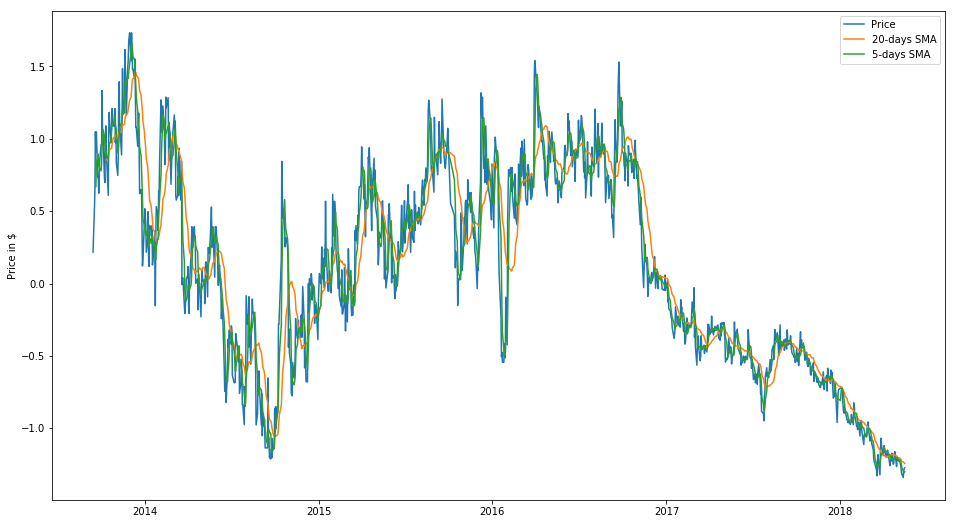

In [44]:
start_date = '1982-05-01'
end_date = '2018-05-17'
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(combs.loc[start_date:end_date, :].index, combs.loc[start_date:end_date, 'Regressed5Price'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Regressed5Price'], label = '20-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Regressed5Price'], label = '5-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

## Bollinger

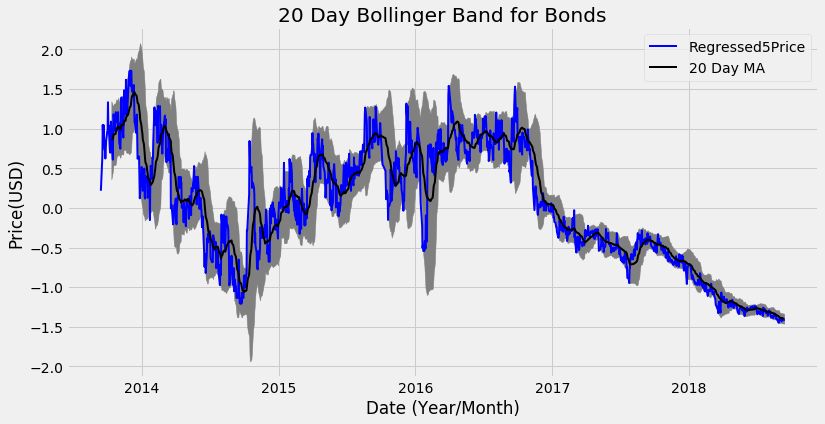

In [45]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis = combs.index.get_level_values(0)
ax.fill_between(x_axis, combs['Upper Band'], combs['Lower Band'], color='grey')
ax.plot(x_axis, combs['Regressed5Price'], color='blue', lw=2)
ax.plot(x_axis, combs['20 Day MA'], color='black', lw=2)
ax.set_title('20 Day Bollinger Band for Bonds')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

## Trading stratergy
We buy when the price is just rising above the lower band mean and we sell when the price dips from the upper band mean


In [46]:
upm=combs['Upper Band'].mean()
upm

0.37315086223522936

In [47]:
lpm=combs['Lower Band'].mean()
lpm

-0.363349013846728

In [57]:
buy=0
sell=0
hold=0
for a in combs.values:
    if(a[3]<= lpm):
        print("Buy")
        #print(a['observation_date'])
        price['Status']="Buy"
        buy += 1
    elif(a[3] >= upm):
        print("Sell")
        #print(a['observation_date'])
        price['Status']="Sell"
        sell += 1
    else:
        print("Hold")
        #print(a[4])
        price['Status']="Hold"
        hold += 1

Hold
Hold
Hold
Sell
Hold
Hold
Hold
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Sell
Hold
Hold
Hold
Sell
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy
Buy
Buy
Hold
Buy
Hold
Buy
Hold
Hold
Buy
Buy
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Sell
Sell
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Sell
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy
Buy
Buy
Buy
Buy
Hold
Hold
Buy
Buy
Buy
Buy
Buy
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy
Buy
Buy
Buy
Buy
Hold
Buy
Buy
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Buy
Buy
Hold
Hold
Hold
Hold
Ho

In [53]:
combs.head()

,3MonthPrice,1Price,2Price,5Price,Regressed5Price,20 Day MA,20 Day STD,Upper Band,Lower Band
observation_date,,,,,,,,,
2013-09-13,0.965293,1.164121,1.136747,-0.322917,0.216567,NaN,NaN,NaN,NaN
2013-09-16,0.935183,1.164121,1.321129,-0.186921,0.523886,NaN,NaN,NaN,NaN
2013-09-17,0.965293,1.202163,1.419347,-0.111699,0.650805,NaN,NaN,NaN,NaN
2013-09-18,0.965293,1.240891,1.684417,0.509590,1.047350,NaN,NaN,NaN,NaN
2013-09-19,0.965293,1.280322,1.684417,0.282186,0.908065,NaN,NaN,NaN,NaN
